# <img style="float: left; padding-right: 10px; width: 200px" src="https://fligoo.com/img/logo-large.png"> Fligoo - Credit Risk

Tech Interview for Data Scientist

<hr style="height:2pt">

## Motivation

Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank's risk-adjusted rate of return by maintaining credit risk exposure within acceptable parameters. Banks need to manage the credit risk inherent in the entire portfolio as well as the risk in individual credits or transactions. 

## Description

The following dataset has 150.000 records of borrowers taken from an anonymous bank, which are described through 12 different columns.

The goal of this test is to perform an Exploratory Data Analysis (EDA) on this dataset, to understand the information contained and obtain insights that could be relevant to solve a business problem and develop a simple model that could predict the risk.

You can find the data in this [link](https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv)

Below is a description of the involved columns:

| Variable Name | Description | 
| ------------- | ----------- |
| unnamed:0 | ID of borrower |
| serious_dlqin2yrs | Person experienced 90 days past due delinquency or worse |
| revolving_utilization_of_unsecured_lines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits |
| age | Age of borrower in years | 
| number_of_time30-59_days_past_due_not_worse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years |
| debt_ratio | Monthly debt payments, alimony, living costs divided by monthy gross income |
| monthly_income | Monthly income |
| number_of_open_credit_lines_and_loans | Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards) |
| number_of_times90_days_late | Number of times borrower has been 90 days or more past due |
| number_real_estate_loans_or_lines | Number of mortgage and real estate loans including home equity lines of credit |
| number_of_time60-89_days_past_due_not_worse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years |
| number_of_dependents | Number of dependents in family excluding themselves (spouse, children etc.) |


Please **read carefully** all the assignments to guide the work that is expected to find in this notebook.

## Goal

In this notebook you have to load all the libraries you need to explore and process the given dataset, and then perform the analysis to extract meaningful facts in order to understand the information involved. You are free to make any kind of analytic you want, but at the end it is expected to have done the "mandatory" tasks on this work. In addition, there are some "nice to have" aspects that would enrich the work done.

> Please provide reports in English and focus on findings and insights

**Stack of technologies:** The analysis on this notebook should be done by using at least the following stack:   
    - Python 3.x (not 2.x)
    - Pandas 1.0.x

### Assignment

- **Report insights and conclusions:** Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by charts / tables / metrics. 
- **Data Quality Check:** You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data.     
   
- **Feature extraction:** Indicate some possible candidates of features that could properly describe the borrowers, either from the given columns or from their transformations.
- **Machine Learning modeling:** at least one fitted model with the given data. You could use the `serious_dlqin2yrs` column as target.


### Nice to have aspects

- Dockerfile to setup environment.
- Identify features and new attributes / tables that could be relevant or needed for better analysis
- **Code versioning with Git** (you are free to publish it on your own Github/Bitbucket account!).
- **Show proficiency in Python:** By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- **Use cases:** Describe possible use cases for this dataset that could add value to the given business, indicating methods / techniques and algorithms for each of them and justifying the choice made.
- **Machine Learning approaches:** Describe the possible Machine Learning tasks that could be performed from the given data, which may be valuable in the context of the finance domain (just explain with words, don't fit a model).

Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) to esteban.delboca@fligoo.com. Then you are going to have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.

**Have fun!**

![Have fun](https://media1.tenor.com/images/8d13f337a8c6e5aab8ba1bd8acd4da0c/tenor.gif?itemid=5304821)

## Tech Interview - Yanina Vanesa Iberra (Part I)

### 1. Data Analysis

- Check pandas library version installed

In [ ]:
import pandas as pd

print(pd.__version__)

- Check Python version installed

In [ ]:
import sys

print(sys.version)

- **Import the necessary libraries**

In [1]:
# Command that will allow to see a graphic in this notebook below the line of code that invokes it.
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

- **Reading the CSV data file using pandas** <br> <br>
File separated by comma, de default read_csv function delimiter is comma, therefore, this parameter is omitted.

In [3]:
borrowers = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv')

- **Get an overview of the dataset**

Let's inspect the first 10 rows of `borrowers` using the` .head () `function.

In [4]:
borrowers.head(10)

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,0.0
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Let's inspect the last 10 rows of `borrowers` using the` .head () `function.

In [5]:
borrowers.tail(10)

,unnamed: 0,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
149990,149991,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
149991,149992,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
149992,149993,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149993,149994,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
149994,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


- **Delete row Unnamed: 0**

In [6]:
borrowers.drop('unnamed: 0', axis=1, inplace=True)

In [7]:
borrowers.head(10)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


- **Let's see how many rows and columns `borrowers` has.**

In [8]:
row, col = borrowers.shape

print(f"Borrowers dataframe rows: {row}")

print(f"Borrowers dataframe columns: {col}")

Borrowers dataframe rows: 150000
Borrowers dataframe columns: 11


- **Let's see what kind of data structure the variable `borrowers` contains.**

In [9]:
type(borrowers)

pandas.core.frame.DataFrame

- **Let's see what types of data each of the `borrowers` columns contain**

In [ ]:
borrowers.dtypes

There are no categorical variables.

- The info() method of pandas.DataFrame can display information such as the number of rows and columns, the total memory usage, the data type of each column, and the number of non-NaN elements.

In [ ]:
borrowers.info()

**Descriptive Statistics** <br> <br>
Describe the all dataset statistical properties.

In [10]:
borrowers[borrowers.columns[1:]].describe()

,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [13]:
borrowers['monthly_income'].max() # Borrar después ésta linea 

3008750.0

**Observations**:
- There are 150000 cases in dataset.
- Out of 11 variables available, `serious_dlqin2yrs` is the binary dependent variable for which model has to be developed.
- `monthly_income` has large number of missing values.
- There are high numbers of extreme values(outliers) for `revolving_utilization_of_unsecured_lines`, `debt_ratio` and `monthly_income` as indicated by high Standard Deviation.
- `age` variable have one case showing 0.

**Calculation of what percentage of values each possible value of the target variable `serious_dlqin2yrs` has.**

In [14]:
target_len = len(borrowers['serious_dlqin2yrs'])
percentage_var = (borrowers['serious_dlqin2yrs'].value_counts()/target_len)*100
percentage_var

0    93.316
1     6.684
Name: serious_dlqin2yrs, dtype: float64

Graph of the percentages for each possible target value.

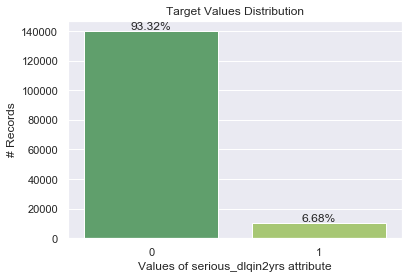

In [15]:
sns.set()
sns.countplot(borrowers.serious_dlqin2yrs, palette='summer').set_title('Target Values Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/target_len)),
            fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Values of serious_dlqin2yrs attribute")
ax.set_ylabel("# Records")
plt.show()

**OPEN POINT: Observation:** <br><br>
Disproportionate percentage of samples for dependent variable. Sampling of training dataset required to remove bias in model development.

### 2. Data Pre- Processing

#### 2.1 Missing Value Analysis

.isnull (). Returns a new DataFrame in which we will have the value False if it is not missing and True if that value is missing.

In [ ]:
borrowers.isnull()

In [ ]:
borrowers.isna() #another option

We can however combine this function with others in order to obtain the total number of missing data. For example, we can use .isnull().sum(). <br> These numbers return the number of missing values in each column.

In [145]:
print(f"Missing values in each attribute: \n{borrowers.isnull().sum()}")

Missing values in each attribute: 
serious_dlqin2yrs                                  0
revolving_utilization_of_unsecured_lines           0
age                                                0
number_of_time30-59_days_past_due_not_worse        0
debt_ratio                                         0
monthly_income                                 29731
number_of_open_credit_lines_and_loans              0
number_of_times90_days_late                        0
number_real_estate_loans_or_lines                  0
number_of_time60-89_days_past_due_not_worse        0
number_of_dependents                               0
dtype: int64


Graphical representation of the missing values.

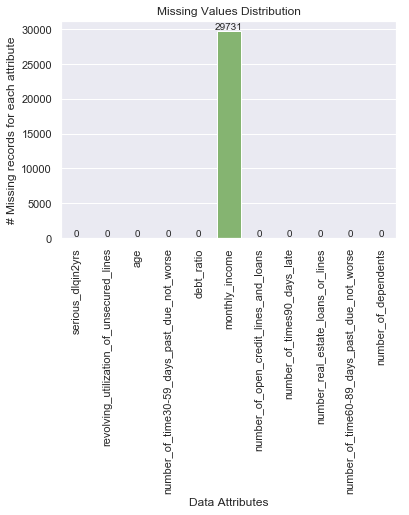

In [16]:
x = borrowers.columns
y = borrowers.isnull().sum()
sns.set()
sns.barplot(x,y, palette='summer').set_title('Missing Values Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=10, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("# Missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

Let's see the lost values in percentages.

In [ ]:
print(f"Missing values in each attribute: \n{borrowers.isnull().sum() / row * 100}")

**Observations:**

- `monthly_income` attribute has large number of missing values. We can see that the variable has 29731 null values. And this represent the 20% approx.
- We can eliminate all the rows that have missing values, but this requires an analysis of the amount of missing data and its impact first. <br>
- From our intuition, we know that `monthly_income` is an important predictor for credit scoring, therefore we won’t drop those data-points and find the best strategy to replace NULL values.<br>
- It may be necessary to complete some of them with one of the following methods: mean, median, mode, k-nearest neighbor.
<br><br>
Let's see some statistical details of `monthly_income` column of a DataFrame using the .describe () function.

In [ ]:
borrowers['monthly_income'].describe()

In [ ]:
borrowers_median = borrowers['monthly_income'].median()
borrowers_median

In [17]:
borrowers_mean = borrowers['monthly_income'].mean()
borrowers_mean

6670.221237392844

**We will test the whole process with a new dataframes with null values replaced by the mean.**

In [ ]:
# Reemplazar ésta parte por el uso de 
# from sklearn.impute import SimpleImputer

In [18]:
borrowers_with_mean= borrowers.apply(lambda x: x.fillna(x.mean()),axis=0)

In [23]:
borrowers_with_mean['monthly_income'].median() # Borrar después ésta linea, el máximo sigue siendo el mismo

6600.0

**Verify that there are no more null values.**

In [ ]:
borrowers_with_mean.isnull().sum()

The number of records has not been changed.

In [ ]:
borrowers_with_mean.shape

The original dataframe was not modified.

In [ ]:
borrowers.isnull().sum()

In [129]:
def histograma(variable, color):
    plt.figure()
    name = variable.name
    plt.hist(variable, color=color, alpha=0.5, bins=20)
    plt.xlabel(name)
    plt.ylabel('Events')
    plt.title(f'{name} Variable Distribution')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.show()

#### 2.2 Outliers Detection

- **`age` attribute**

The `age` variable has a record with value '0', as it is a single record we decided to eliminate it.

In [24]:
borrowers_with_mean.drop(borrowers_with_mean[borrowers_with_mean.age == 0].index, inplace=True)

- **`number_of_time30-59_days_past_due_not_worse` attribute**

The `number_of_time30-59_days_past_due_not_worse` variable has a record with value '96' and '98', we replace them with the median value.

In [25]:
import collections

In [26]:
collections.Counter(borrowers_with_mean['number_of_time30-59_days_past_due_not_worse'])

Counter({2: 4598,
         0: 126018,
         1: 16032,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [27]:
def outlier_days_past_due_not_worse(attribute):
    New = []
    med = borrowers_with_mean[attribute].median()
    for val in borrowers_with_mean[attribute]:
        if ((val == 98) | (val == 96)):
            New.append(med)
        else:
            New.append(val)
    borrowers_with_mean[attribute] = New
    #return borrowers_with_mean

In [28]:
outlier_days_past_due_not_worse('number_of_time30-59_days_past_due_not_worse')

In [29]:
collections.Counter(borrowers_with_mean['number_of_time30-59_days_past_due_not_worse'])

Counter({2.0: 4598,
         0.0: 126287,
         1.0: 16032,
         3.0: 1754,
         4.0: 747,
         5.0: 342,
         7.0: 54,
         10.0: 4,
         6.0: 140,
         12.0: 2,
         8.0: 25,
         9.0: 12,
         13.0: 1,
         11.0: 1})

Apply the same function to the other attributes of type "days_past_due_not_worse".

In [30]:
outlier_days_past_due_not_worse('number_of_times90_days_late')

In [31]:
outlier_days_past_due_not_worse('number_of_time60-89_days_past_due_not_worse')

In [32]:
collections.Counter(borrowers_with_mean['number_of_times90_days_late'])

Counter({0.0: 141930,
         1.0: 5243,
         3.0: 667,
         2.0: 1555,
         5.0: 131,
         4.0: 291,
         10.0: 8,
         9.0: 19,
         6.0: 80,
         7.0: 38,
         8.0: 21,
         15.0: 2,
         11.0: 5,
         13.0: 4,
         14.0: 2,
         17.0: 1,
         12.0: 2})

In [33]:
collections.Counter(borrowers_with_mean['number_of_time60-89_days_past_due_not_worse'])

Counter({0.0: 142664,
         1.0: 5731,
         2.0: 1118,
         5.0: 34,
         3.0: 318,
         4.0: 105,
         6.0: 16,
         7.0: 9,
         8.0: 2,
         11.0: 1,
         9.0: 1})

**Descriptive Statistics After Data Cleaning**

In [34]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000,1.499990e+05,149999.000000,149999.000000,149999.000000,149999.000000,149999.000000
mean,0.066840,6.048472,52.295555,0.245348,353.007426,6.670226e+03,8.452776,0.090294,1.018233,0.064707,0.737405
std,0.249746,249.756203,14.771298,0.697231,2037.825113,1.288049e+04,5.145964,0.485108,1.129772,0.329790,1.107020
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154176,52.000000,0.000000,0.366503,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559044,63.000000,0.000000,0.868257,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,58.000000,17.000000,54.000000,11.000000,20.000000


- After data cleaning total number of cases down to 149999.
- The minimum value of the `age` attribute is no longer `0` but `21`.
- Outliers in variables `revolving_utilization_of_unsecured_lines`, `debt_ratio` and `monthly_income` to be removed through binning.

**Let's see if some of the variables have values that can be described as outliers (attributes with high Standard Deviation).

- **`revolving_utilization_of_unsecured_lines` attribute outliers**

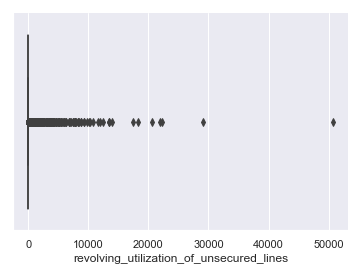

In [35]:
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- **`debt_ratio` attribute outliers**

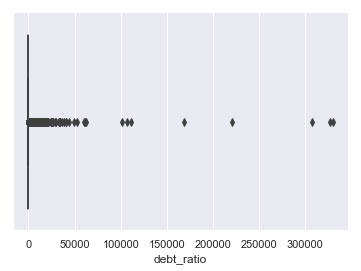

In [36]:
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- **`monthly_income` attribute outliers**

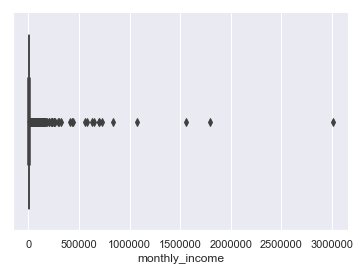

In [37]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

- Way to decrease outliers:
    - z-score
        - Consider that any value that is far from the average=0 is an outlier.
        - It depends on the mean and the standard deviation to measure centrality and dispersion, which are very affected by outliers. If the variables do not have a normal distribution, I end up removing many outliers from the dataset.
        - It does not work well in very small datasets.
    - Interquartile range: 
        - It is robust and not as sensitive to outliers.

In [39]:
from scipy import stats

In [40]:
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = collections.Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# detect outliers from Age, SibSp , Parch and Fare
# These are the numerical features present in the dataset
Outliers_to_drop = detect_outliers(borrowers_with_mean,2,["revolving_utilization_of_unsecured_lines",
                                            "age",
                                            "number_of_time30-59_days_past_due_not_worse",
                                            "debt_ratio",
                                            "monthly_income",
                                            "number_of_open_credit_lines_and_loans",
                                            "number_of_times90_days_late",
                                            "number_real_estate_loans_or_lines",
                                            "number_of_time60-89_days_past_due_not_worse",
                                            "number_of_dependents"])

In [41]:
borrowers_with_mean.loc[Outliers_to_drop]

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
900,0,2.258964,33,2.0,0.032484,2000.000000,1,1.0,0,0.0,2.0
919,1,1.362142,73,1.0,274.000000,6670.221237,2,3.0,0,1.0,0.0
1958,0,1.634551,28,0.0,151.000000,6670.221237,1,3.0,0,2.0,0.0
4793,0,3746.000000,52,2.0,0.481353,2600.000000,5,0.0,1,0.0,3.0
4852,0,1.566866,46,2.0,0.104983,6000.000000,3,2.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
142226,1,0.859714,55,0.0,0.599348,11046.000000,18,7.0,6,6.0,1.0
142830,0,0.889452,47,0.0,0.411026,8833.000000,13,3.0,1,1.0,3.0
143782,1,1.000000,38,0.0,0.250573,5666.000000,4,2.0,1,1.0,3.0
146360,0,0.921219,45,0.0,0.092564,3845.000000,3,1.0,0,1.0,3.0


We detected 4938 outliers in the dataset, which represents 3.29% of our training data. We will drop these outliers.

In [42]:
borrowers_with_mean.shape

(149999, 11)

In [43]:
borrowers_with_mean = borrowers_with_mean.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
borrowers_with_mean.shape

In [44]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,145061.000000,145061.000000,145061.000000,145061.000000,145061.000000,1.450610e+05,145061.000000,145061.000000,145061.000000,145061.000000,145061.000000
mean,0.055466,5.547413,52.425262,0.197158,338.511789,6.593925e+03,8.401583,0.055377,0.999903,0.036405,0.711321
std,0.228889,242.079604,14.844237,0.603047,2032.229250,1.263117e+04,5.036792,0.363150,1.042804,0.230585,1.076328
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028597,41.000000,0.000000,0.171971,3.900000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.144521,52.000000,0.000000,0.361836,6.507000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.527667,63.000000,0.000000,0.826113,7.375000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,57.000000,17.000000,25.000000,11.000000,10.000000


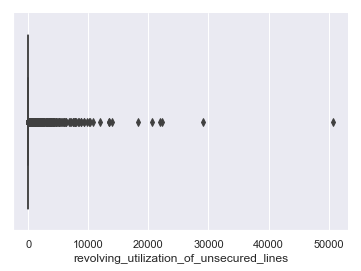

In [45]:
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

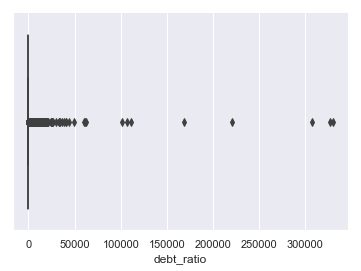

In [46]:
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

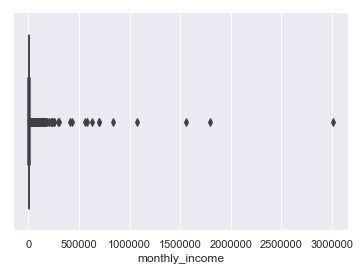

In [47]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

**Although the standard deviation of the three variables that had the highest standard deviation decreased, they still have outliers.<br>
Try with z-score function.**

In [48]:
def my_zscore(df, attribute, threshold):
    z = stats.zscore(np.array(df[attribute]))
    z_index = df[attribute][np.abs(z) < threshold].index
    return df.loc[z_index]

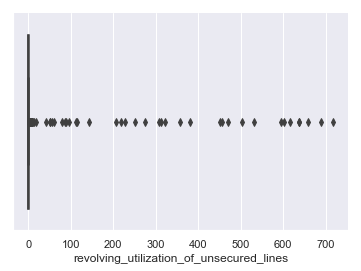

In [51]:
borrowers_with_mean = my_zscore(borrowers_with_mean, 'revolving_utilization_of_unsecured_lines', 3)
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()
# ver porqué el bloxplot queda sin outliers recién luego de ejecutada varias veces la función

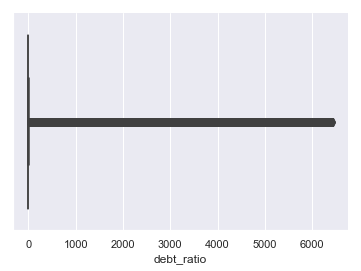

In [52]:
borrowers_with_mean=my_zscore(borrowers_with_mean,'debt_ratio', 3)
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()
# ver porqué el bloxplot queda sin outliers luego de ejecutada varias veces la función

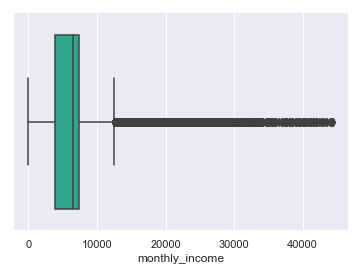

In [49]:
borrowers_with_mean = my_zscore(borrowers_with_mean,'monthly_income', 3)
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()
# ver porqué el bloxplot queda sin outliers luego de ejecutada varias veces la función

In [ ]:
borrowers_with_mean.shape

In [53]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000
mean,0.055512,0.388714,52.417358,0.197381,290.750699,6358.631710,8.384116,0.055720,0.989709,0.036582,0.711429
std,0.228977,6.149341,14.864049,0.603208,861.705294,3948.880827,5.027249,0.364351,1.026609,0.231226,1.076273
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028518,41.000000,0.000000,0.172178,3885.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.143765,52.000000,0.000000,0.361039,6500.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.525581,63.000000,0.000000,0.811555,7350.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,717.000000,109.000000,13.000000,6438.000000,44395.000000,57.000000,17.000000,25.000000,11.000000,10.000000


In [54]:
target_len = len(borrowers_with_mean['serious_dlqin2yrs'])
percentage_var = (borrowers_with_mean['serious_dlqin2yrs'].value_counts()/target_len)*100
percentage_var

0    94.448842
1     5.551158
Name: serious_dlqin2yrs, dtype: float64

**Try with other way** 

**`debt_ratio` attribute outliers delete.**

In [55]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

In [56]:
minUpperBound = min([val for (val, out) in zip(borrowers_with_mean.debt_ratio, mad_based_outlier(borrowers_with_mean.debt_ratio)) if out == True])

In [57]:
minUpperBound

1.604697651

In [58]:
newDebtRatio = []
for val in borrowers_with_mean.debt_ratio:
    if val >= minUpperBound:
        newDebtRatio.append(minUpperBound)
    else:
        newDebtRatio.append(val)

borrowers_with_mean.debt_ratio = newDebtRatio

In [59]:
borrowers_with_mean.shape

(144006, 11)

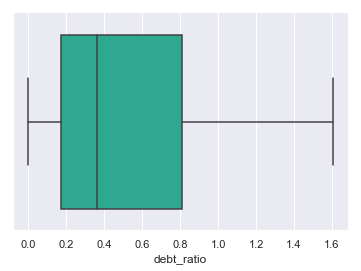

In [60]:
sns.boxplot(x='debt_ratio', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()
# ver porqué el bloxplot queda sin outliers luego de ejecutada varias veces la función

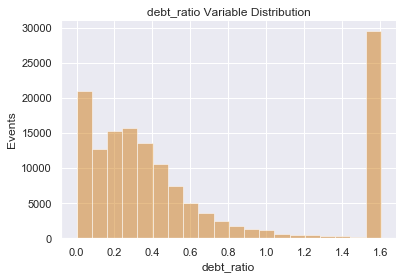

In [130]:
histograma(borrowers_with_mean['debt_ratio'], color="#cf7c17")

**Obervation:**
<br><br>
It can be observed that the variable `debt_ratio` no longer has outliers.
<br><br>

**`monthly_income` attribute outliers delete.**

Discretize variable into equal-sized buckets based on rank or based on sample quantiles.

In [63]:
borrowers_with_mean['monthly_income_bin'] = pd.qcut(borrowers_with_mean.monthly_income.values, 5).codes

In [64]:
borrowers_with_mean.shape

(144006, 12)

In [68]:
collections.Counter(borrowers_with_mean['monthly_income_bin'])

Counter({4: 28642, 0: 28802, 1: 28801, 2: 44100, 3: 13661})

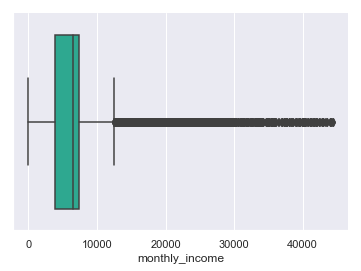

In [69]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

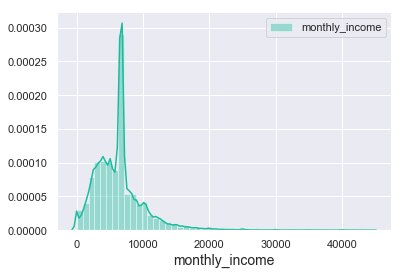

In [72]:
sns.distplot(borrowers_with_mean['monthly_income'], color='#1ABC9C', label='monthly_income')
plt.xlabel('monthly_income', size=14)
plt.legend()
sns.despine()

In [73]:
minUpperBound = min([val for (val, out) in zip(borrowers_with_mean.monthly_income, mad_based_outlier(borrowers_with_mean.monthly_income)) if out == True])

In [74]:
minUpperBound

16880.0

In [75]:
new_monthly_income = []
for val in borrowers_with_mean.monthly_income:
    if val >= minUpperBound:
        new_monthly_income.append(minUpperBound)
    else:
        new_monthly_income.append(val)

In [76]:
borrowers_with_mean.monthly_income = new_monthly_income

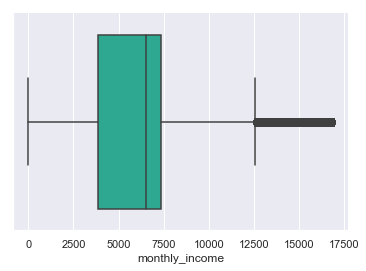

In [77]:
sns.boxplot(x='monthly_income', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

In [78]:
borrowers_with_mean['monthly_income'].describe()

count    144006.000000
mean       6238.059699
std        3399.965586
min           0.000000
25%        3885.000000
50%        6500.000000
75%        7350.000000
max       16880.000000
Name: monthly_income, dtype: float64

**Obervation:**
<br><br>
It can be observed that the variable `monthly_income` considerably reduced the number of outliers.
<br><br>

**`revolving_utilization_of_unsecured_lines` attribute outliers delete.**

In [79]:
revNew = []
borrowers_with_mean['revolving_utilization_of_unsecured_lines']
for val in borrowers_with_mean['revolving_utilization_of_unsecured_lines']:
    if val <= 0.99999:
        revNew.append(val)
    else:
        revNew.append(0.99999)
borrowers_with_mean['revolving_utilization_of_unsecured_lines'] = revNew

In [ ]:
borrowers_with_mean.shape

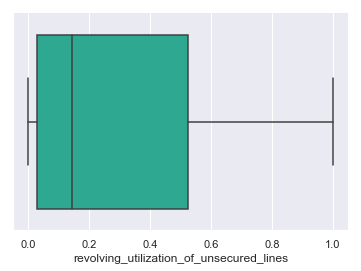

In [80]:
sns.boxplot(x='revolving_utilization_of_unsecured_lines', data=borrowers_with_mean, color='#1ABC9C')
sns.despine()

**Obervation:**
<br><br>
It can be observed that the variable `revolving_utilization_of_unsecured_lines` no longer has outliers.
<br><br>

In [81]:
borrowers_with_mean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,monthly_income_bin
count,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000,144006.000000
mean,0.055512,0.306820,52.417358,0.197381,0.587775,6238.059699,8.384116,0.055720,0.989709,0.036582,0.711429,1.892643
std,0.228977,0.342482,14.864049,0.603208,0.568141,3399.965586,5.027249,0.364351,1.026609,0.231226,1.076273,1.370748
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028518,41.000000,0.000000,0.172178,3885.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.143765,52.000000,0.000000,0.361039,6500.000000,8.000000,0.000000,1.000000,0.000000,0.000000,2.000000
75%,0.000000,0.525581,63.000000,0.000000,0.811555,7350.000000,11.000000,0.000000,2.000000,0.000000,1.000000,3.000000
max,1.000000,0.999990,109.000000,13.000000,1.604698,16880.000000,57.000000,17.000000,25.000000,11.000000,10.000000,4.000000


**OPEN POINT: Variable Binning**

- Age: Age Binning containing bins for age group

| Age Group | Bin | 
| --- | --- |
| 21-30 | 1 |
| 31-40 | 2 |
| 41-50 | 3 |
| 51-60 | 4 |
| > 60 | 5 |


- DebtRatio & RevolvingUtilizationOfUnsecuredLines: Created variables DebtRatio_Binning and RevolvingUtilizationOfUnsecuredLines_Binning with following cut off values:

| Group | Bin | Remark |
| --- | --- |  --- |
| <=0.25  | 1 |  Good |
| 0.25 - 0.50  | 2 |  Low Risk |
| > 0.50 | 3 |  High Risk |


- MonthlyIncome: Variable MonthlyIncome_Binning with 5 equal width bins

### Exploratory Analysis

### Delinquency over different categories

**a) Age**

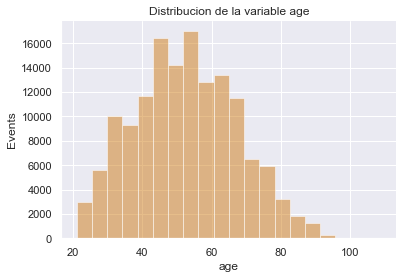

In [123]:
histograma(borrowers_with_mean['age'], color="#cf7c17")

In [83]:
borrowers_with_mean[borrowers_with_mean['age'] >= 50].shape

(80791, 12)

In [84]:
borrowers_with_mean[borrowers_with_mean['age'] < 50].shape

(63215, 12)

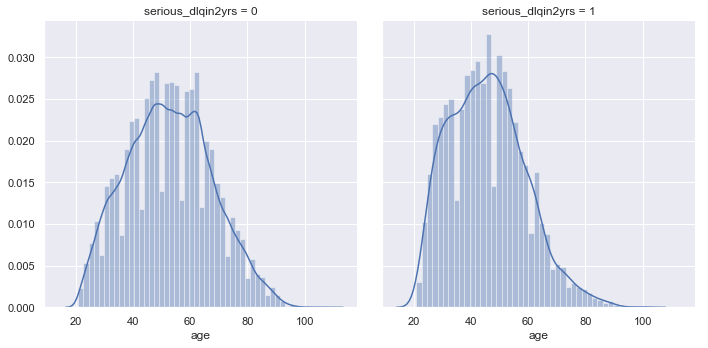

In [85]:
# Explore Age vs Target
g = sns.FacetGrid(borrowers_with_mean, col='serious_dlqin2yrs')
plt.gcf().set_size_inches(10, 5)
g = g.map(sns.distplot, "age")

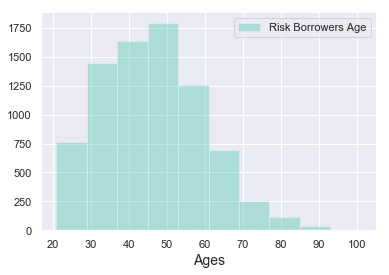

In [125]:
risk_borrowers=borrowers_with_mean[(borrowers_with_mean['serious_dlqin2yrs'] == 1)]
plt.hist(risk_borrowers['age'], color='#1ABC9C', label='Risk Borrowers Age', alpha=0.3)
plt.xlabel('Ages', size=14)
plt.legend()
sns.despine()

In [87]:
borrowers_with_mean['age_bin'] = pd.qcut(borrowers_with_mean.age.values, 5).codes

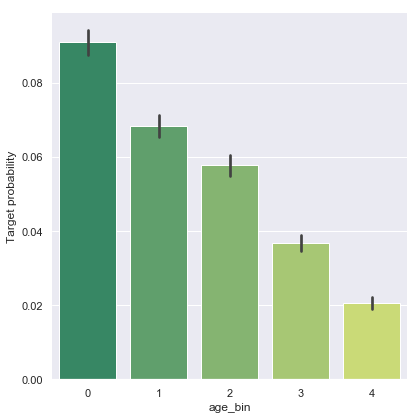

In [88]:
# Explore age feature vs Target
g  = sns.factorplot(x="age_bin",y="serious_dlqin2yrs",data=borrowers_with_mean,kind="bar", size = 6 , 
palette = "summer")
g.despine(left=True)
g = g.set_ylabels("Target probability")

**Observations:**
- Maximum borrowers from age group 50+
- Borrowers risk is highest for age group of 40-50 and Lowest in 20-30 age group.
- We can see that age has an inverse relationship to default risk.

**b) Number of Dependents**

In [117]:
borrowers_with_mean['number_of_dependents'].describe()

count    144006.000000
mean          0.711429
std           1.076273
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: number_of_dependents, dtype: float64

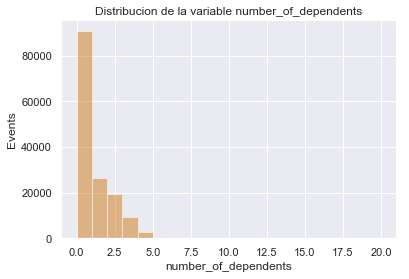

In [128]:
histograma(borrowers['number_of_dependents'], color="#cf7c17")

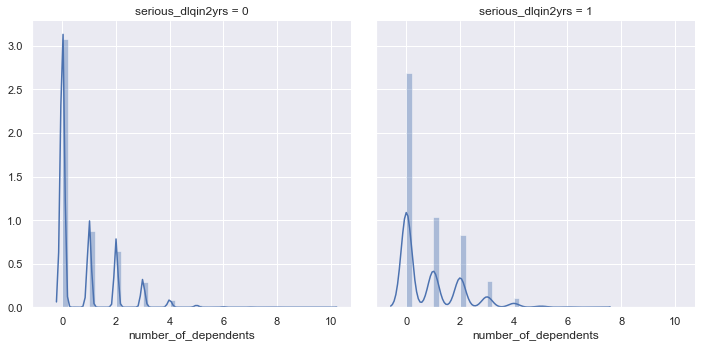

In [131]:
# Explore number_of_dependents vs Target
g = sns.FacetGrid(borrowers_with_mean, col='serious_dlqin2yrs')
plt.gcf().set_size_inches(10, 5)
g = g.map(sns.distplot, "number_of_dependents")

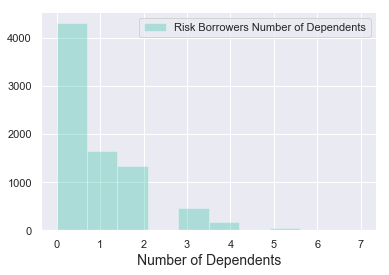

In [132]:
risk_borrowers=borrowers_with_mean[(borrowers_with_mean['serious_dlqin2yrs'] == 1)]
plt.hist(risk_borrowers['number_of_dependents'], color='#1ABC9C', label='Risk Borrowers Number of Dependents', alpha=0.3)
#plt.hist(borrowers_with_mean['serious_dlqin2yrs'], color='#EB984E', label='Todos', alpha=0.3)
plt.xlabel('Number of Dependents', size=14)
plt.legend()
sns.despine()

In [133]:
borrowers_with_mean['number_of_dependents_bin'] = pd.qcut(borrowers_with_mean.monthly_income.values, 5).codes

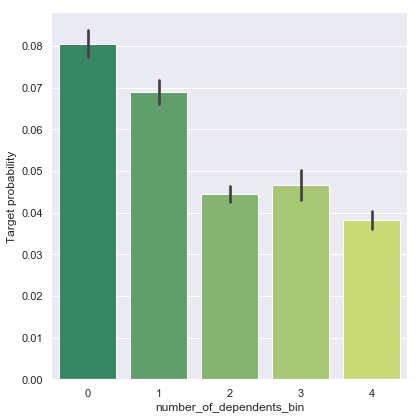

In [134]:
# Explore Monthly number_of_dependents_bin feature vs Target
g  = sns.factorplot(x="number_of_dependents_bin",y="serious_dlqin2yrs",data=borrowers_with_mean,kind="bar", size = 6 , 
palette = "summer")
g.despine(left=True)
g = g.set_ylabels("Target probability")

Dependents greater than '3'.

In [141]:
borrowers_with_mean[borrowers_with_mean['number_of_dependents'] >= 3].shape[0] / borrowers_with_mean['number_of_dependents'].shape[0] * 100

8.041331611182867

**Observations:**
- Around 60% data have number of dependents as 0; Delinquency count and percentage also highest for this group.
- Total percentage share of data with dependents greater than 3 is only around 8%.

**c) Debt Ratio**

In [108]:
borrowers_with_mean.debt_ratio.describe()

count    144006.000000
mean          0.587775
std           0.568141
min           0.000000
25%           0.172178
50%           0.361039
75%           0.811555
max           1.604698
Name: debt_ratio, dtype: float64

In [109]:
bins_debt_ratio = [-1, 0.25, 0.5, 1.7]
debt_ratio_categories = pd.cut(borrowers_with_mean['debt_ratio'], bins=bins_debt_ratio, 
                          labels=['Good', 'Low Risk', 'High Risk'])

In [111]:
borrowers_with_mean['debt_ratio_bin']= debt_ratio_categories

In [112]:
pd.crosstab(borrowers_with_mean['debt_ratio_bin'], borrowers_with_mean['serious_dlqin2yrs'])

serious_dlqin2yrs,0,1
debt_ratio_bin,,
Good,48220,2694
Low Risk,38084,2112
High Risk,49708,3188


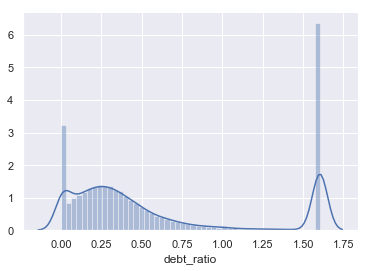

In [113]:
sns.distplot(borrowers_with_mean['debt_ratio'])
sns.despine()

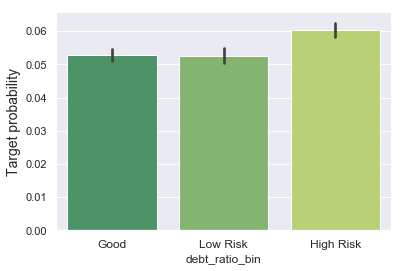

In [114]:
sns.barplot(x='debt_ratio_bin', y='serious_dlqin2yrs', data=borrowers_with_mean, palette='summer')
plt.xticks(size=12)
plt.xlabel('debt_ratio_bin', size=12)
plt.ylabel('Target probability', size=14)
sns.despine()

**Observations:**
- Around 40% (3188) of borrowers risk from group with Debt Ratio > 0.5 (High Risk).

**d) Revolving Utilization of Unsecured Lines**

In [100]:
borrowers_with_mean.revolving_utilization_of_unsecured_lines.describe()

count    144006.000000
mean          0.306820
std           0.342482
min           0.000000
25%           0.028518
50%           0.143765
75%           0.525581
max           0.999990
Name: revolving_utilization_of_unsecured_lines, dtype: float64

In [101]:
bins_unsecured_lines = [-1, 0.25, 0.5, 0.999990]
unsecured_lines_categories = pd.cut(borrowers_with_mean['revolving_utilization_of_unsecured_lines'], bins=bins_unsecured_lines, 
                          labels=['Good', 'Low Risk', 'High Risk'])

In [102]:
borrowers_with_mean['revolving_utilization_of_unsecured_lines_bin']= unsecured_lines_categories

In [103]:
#RevolvingUtilizationOfUnsecuredLines (Binned) * SeriousDlqin2yrs Crosstabulation
pd.crosstab(borrowers_with_mean['revolving_utilization_of_unsecured_lines_bin'], borrowers_with_mean['serious_dlqin2yrs'])
#.apply(lambda r: r/len(borrowers_with_mean)*100, axis=1)

serious_dlqin2yrs,0,1
revolving_utilization_of_unsecured_lines_bin,,
Good,84423,1651
Low Risk,19366,960
High Risk,32223,5383


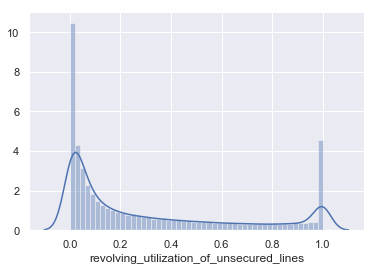

In [104]:
sns.distplot(borrowers_with_mean['revolving_utilization_of_unsecured_lines'])
sns.despine()

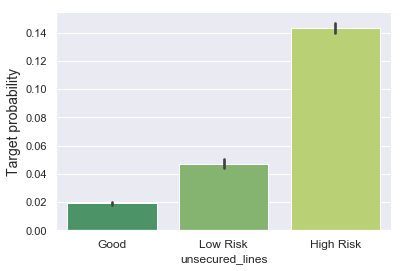

In [105]:
sns.barplot(x='revolving_utilization_of_unsecured_lines_bin', y='serious_dlqin2yrs', data=borrowers_with_mean, palette='summer')
plt.xticks(size=12)
plt.xlabel('unsecured_lines', size=12)
plt.ylabel('Target probability', size=14)
sns.despine()

**Observations:**
- We can that there is an almost exponential relationship between this variable and our target.
- Around 69% (3.738707) of Delinquency from group with RevolvingUtilizationOfCreditLines > 0.5 (High Risk)

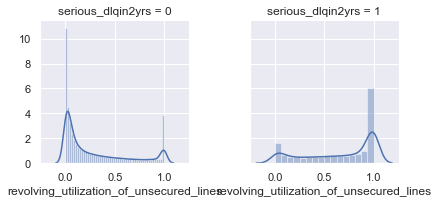

In [106]:
# Explore Age vs Survived
g = sns.FacetGrid(borrowers_with_mean, col='serious_dlqin2yrs')
g = g.map(sns.distplot, "revolving_utilization_of_unsecured_lines")

**e) Monthly Income**

In [89]:
borrowers_with_mean['monthly_income'].describe() # Algo no está bien si quedó con max 4 como sueldo.

count    144006.000000
mean       6238.059699
std        3399.965586
min           0.000000
25%        3885.000000
50%        6500.000000
75%        7350.000000
max       16880.000000
Name: monthly_income, dtype: float64

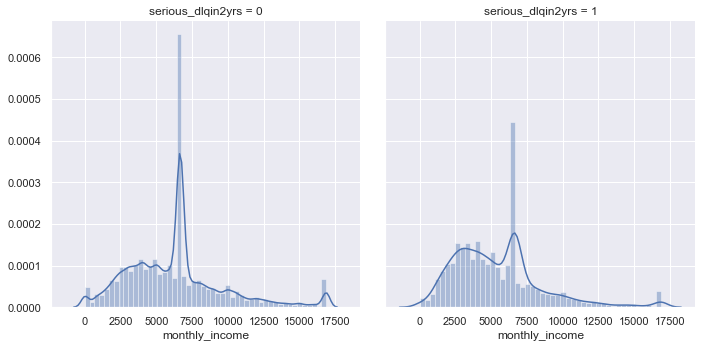

In [90]:
# Explore monthly_income vs Target
g = sns.FacetGrid(borrowers_with_mean, col='serious_dlqin2yrs')
plt.gcf().set_size_inches(10, 5)
g = g.map(sns.distplot, "monthly_income")

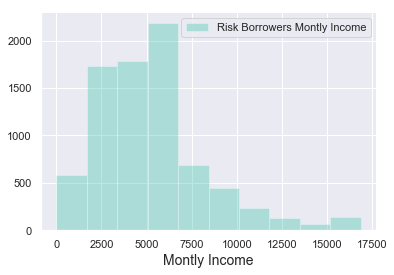

In [92]:
risk_borrowers=borrowers_with_mean[(borrowers_with_mean['serious_dlqin2yrs'] == 1)]
plt.hist(risk_borrowers['monthly_income'], color='#1ABC9C', label='Risk Borrowers Montly Income', alpha=0.3)
plt.xlabel('Montly Income', size=14)
plt.legend()
sns.despine()

In [93]:
borrowers_with_mean['monthly_income__bin'] = pd.qcut(borrowers_with_mean.monthly_income.values, 5).codes

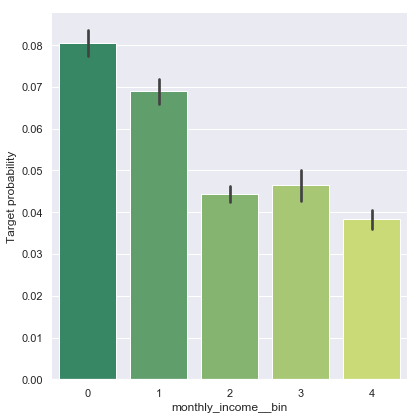

In [94]:
# Explore Monthly Income feature vs Target
g  = sns.factorplot(x="monthly_income__bin",y="serious_dlqin2yrs",data=borrowers_with_mean,kind="bar", size = 6 , 
palette = "summer")
g.despine(left=True)
g = g.set_ylabels("Target probability")

**Observations:**
- More than 50% of defaulters are accounted by lower 40% of the income range (Bin 0 and 1).
- Other 3 groups have more or less same percentage of defaulters.

In [ ]:
Monthly Income vs. Other Financial Variables # GRAFICAR

All parameters below have similar pattern: low income range attributing to high values of debt indicators.
    
i) RevolvingUtilizationOfUnecuredLines, <br>
ii) DebtRatio, <br>
iii) NumberOfTime30-59DaysPastDueNotWorse,  <br>
iv) NumberOfTimes90DaysLate,  <br>
v) NumberOfTime60-089DaysPastDueNotWorse,  <br>
vi) NumberOfOpenCreditLinesAndLoans,  <br>
vii) NumberOfRealEstateLoansOrLines

#### 2.2 Attributes Correlations

In [142]:
corr = borrowers_with_mean[['serious_dlqin2yrs', 'revolving_utilization_of_unsecured_lines', 'age', 'number_of_time30-59_days_past_due_not_worse', 'number_of_time60-89_days_past_due_not_worse', 'number_of_times90_days_late', 'debt_ratio', 'monthly_income', 'number_of_open_credit_lines_and_loans', 'number_real_estate_loans_or_lines', 'number_of_dependents', 'monthly_income_bin', 'age_bin', 'debt_ratio_bin', 'revolving_utilization_of_unsecured_lines_bin', 'number_of_dependents_bin']].corr(method = 'pearson')

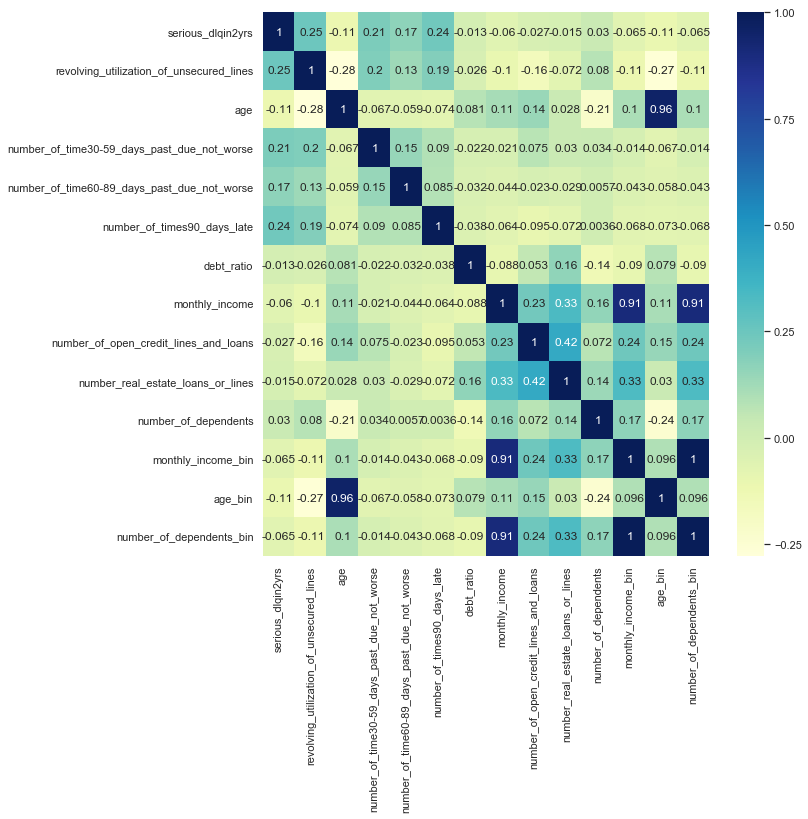

In [143]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True);

There is a high correlation between:
- `number_of_time30-59_days_past_due_not_worse`, `number_of_time60-89_days_past_due_not_worse` and `number_of_times90_days_late` variables. (NO SÉ PORQUÉ SE PERDIÓ LA CORRELACIÓN ENTRE ÉSTAS VARIABLES).
- `number_of_open_credit_lines_and_loans` and `number_real_estate_loans_or_lines` variables.

**Save the modified dataframe for the following steps (building a model).**

In [144]:
borrowers_with_mean.to_csv('credit-data-clean.csv')